# Archetypal Quadrants

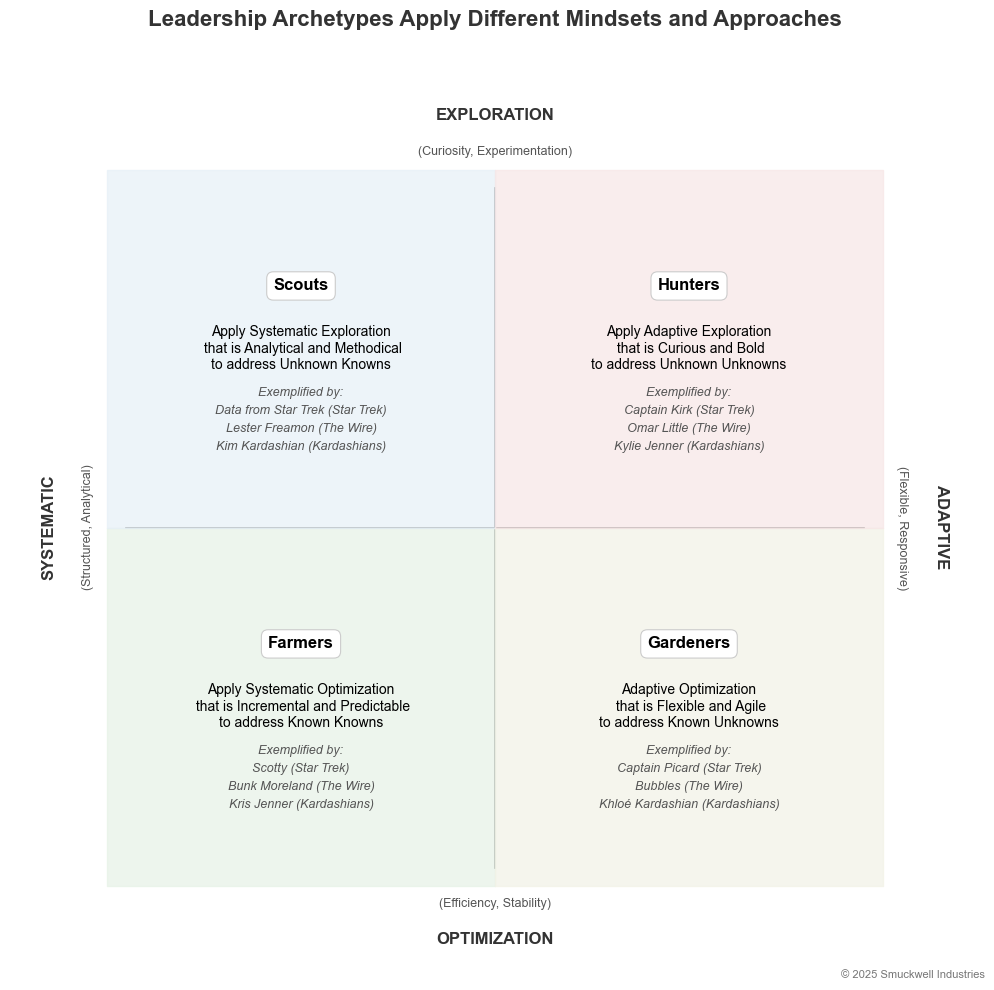

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Set quadrant backgrounds
quadrant_colors = [HBR_COLORS['quadrant1'], HBR_COLORS['quadrant2'], 
                  HBR_COLORS['quadrant3'], HBR_COLORS['quadrant4']]
positions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Set quadrant backgrounds
for color, pos in zip(quadrant_colors, positions):
    ax.fill_between([0, pos[0]*2], 0, pos[1]*2, color=color, alpha=0.7)

# Define archetypes for each quadrant
archetypes = {
    "Scouts": (-1, 1),
    "Hunters": (1, 1),
    "Farmers": (-1, -1),
    "Gardeners": (1, -1)
}

# Define descriptions for each archetype
archetype_descriptions = {
    "Scouts": "Apply Systematic Exploration\n that is Analytical and Methodical\nto address Unknown Knowns",
    "Hunters": "Apply Adaptive Exploration\n that is Curious and Bold\nto address Unknown Unknowns",
    "Farmers": "Apply Systematic Optimization\n that is Incremental and Predictable\nto address Known Knowns",
    "Gardeners": "Adaptive Optimization\n that is Flexible and Agile\nto address Known Unknowns"
}

# Define characteristics for each quadrant
characteristics = {
    (-1, 1): "Analytical, Methodical",
    (1, 1): "Curious, Bold",
    (-1, -1): "Incremental, Predictable",
    (1, -1): "Flexible, Agile"
}

# Define characters for each archetype (grouped by universe)
character_examples = {
    # Star Trek Characters
    "Star Trek": {
        (-1, 1): "Data from Star Trek",          # Scout
        (1, 1): "Captain Kirk",   # Hunter
        (-1, -1): "Scotty",       # Farmer
        (1, -1): "Captain Picard" # Gardener
    },
    # The Wire Characters
    "The Wire": {
        (-1, 1): "Lester Freamon",  # Scout
        (1, 1): "Omar Little",      # Hunter
        (-1, -1): "Bunk Moreland",  # Farmer
        (1, -1): "Bubbles"          # Gardener
    },
    # Kardashian Characters
    "Kardashians": {
        (-1, 1): "Kim Kardashian",  # Scout
        (1, 1): "Kylie Jenner",     # Hunter
        (-1, -1): "Kris Jenner",    # Farmer
        (1, -1): "Khloé Kardashian" # Gardener
    }
}

# Plot labels for archetypes with consistent styling
for archetype, (x, y) in archetypes.items():
    # Main archetype name
    ax.text(x, y + 0.35, archetype, fontsize=12, ha='center', va='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=1, 
                     edgecolor='#cccccc', linewidth=0.8))
    
    # Description below the name
    ax.text(x, y + 0.0, archetype_descriptions[archetype], fontsize=10, ha='center', va='center')
    
    # Character examples - one from each universe
    y_offset = -0.25
    y_offset_increment = 0.10
    ax.text(x, y + y_offset, 'Exemplified by:', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
    y_offset -= y_offset_increment  # Move down for next character

    for universe, characters in character_examples.items():
        char_text = characters[(x, y)]
        ax.text(x, y + y_offset, char_text + ' (' + universe +')', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
        y_offset -= y_offset_increment  # Move down for next character
    
# Create shorter axis lines that don't go all the way to the edge
x_line_length = 1.9  # Shorter horizontal line
y_line_length = 1.9  # Shorter vertical line

# Add shorter horizontal axis line
ax.plot([-x_line_length, x_line_length], [0, 0], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)
# Add shorter vertical axis line
ax.plot([0, 0], [-y_line_length, y_line_length], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)

# Axis labels - moved further away from the axes
# SYSTEMATIC (Left Axis)
ax.text(-2.3, 0, 'SYSTEMATIC', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=90)
ax.text(-2.1, 0, '(Structured, Analytical)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=90)

# ADAPTIVE (Right Axis)
ax.text(2.3, 0, 'ADAPTIVE', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=270)
ax.text(2.1, 0, '(Flexible, Responsive)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=270)

# EXPLORATION (Top Axis)
ax.text(0, 2.3, 'EXPLORATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, 2.1, '(Curiosity, Experimentation)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# OPTIMIZATION (Bottom Axis)
ax.text(0, -2.3, 'OPTIMIZATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, -2.1, '(Efficiency, Stability)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# Configure axes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])

# Set common figure aesthetics
set_figure_aesthetics(fig, ax, 
                     title="Leadership Archetypes Apply Different Mindsets and Approaches")

# Add copyright notice at the bottom of the figure
fig.text(0.99, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetype_quadrants.png')

# Save the figure
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

plt.show()

# Archetypal Quadrants with Finders, Minders, and Grinders 2d regime overlay

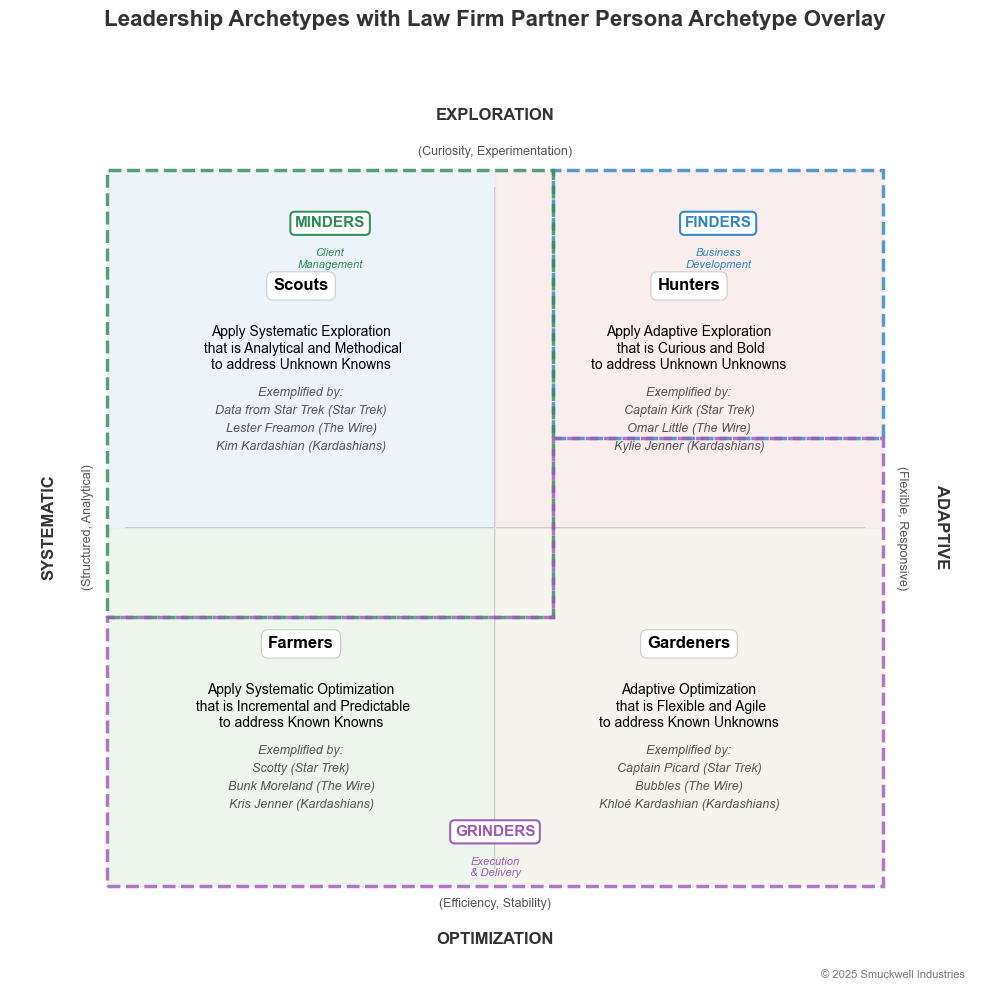

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Add secondary color to HBR_COLORS
HBR_COLORS['secondary'] = '#2E8B57'  # Sea Green color for Minders
HBR_COLORS['primary'] = '#9B59B6'    # Purple color for Grinders (in case it's missing too)

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Set quadrant backgrounds
quadrant_colors = [HBR_COLORS['quadrant1'], HBR_COLORS['quadrant2'], 
                  HBR_COLORS['quadrant3'], HBR_COLORS['quadrant4']]
positions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Set quadrant backgrounds
for color, pos in zip(quadrant_colors, positions):
    ax.fill_between([0, pos[0]*2], 0, pos[1]*2, color=color, alpha=0.7)

# Define archetypes for each quadrant
archetypes = {
    "Scouts": (-1, 1),
    "Hunters": (1, 1),
    "Farmers": (-1, -1),
    "Gardeners": (1, -1)
}

# Define descriptions for each archetype
archetype_descriptions = {
    "Scouts": "Apply Systematic Exploration\n that is Analytical and Methodical\nto address Unknown Knowns",
    "Hunters": "Apply Adaptive Exploration\n that is Curious and Bold\nto address Unknown Unknowns",
    "Farmers": "Apply Systematic Optimization\n that is Incremental and Predictable\nto address Known Knowns",
    "Gardeners": "Adaptive Optimization\n that is Flexible and Agile\nto address Known Unknowns"
}

# Define characteristics for each quadrant
characteristics = {
    (-1, 1): "Analytical, Methodical",
    (1, 1): "Curious, Bold",
    (-1, -1): "Incremental, Predictable",
    (1, -1): "Flexible, Agile"
}

# Define characters for each archetype (grouped by universe)
character_examples = {
    # Star Trek Characters
    "Star Trek": {
        (-1, 1): "Data from Star Trek",          # Scout
        (1, 1): "Captain Kirk",   # Hunter
        (-1, -1): "Scotty",       # Farmer
        (1, -1): "Captain Picard" # Gardener
    },
    # The Wire Characters
    "The Wire": {
        (-1, 1): "Lester Freamon",  # Scout
        (1, 1): "Omar Little",      # Hunter
        (-1, -1): "Bunk Moreland",  # Farmer
        (1, -1): "Bubbles"          # Gardener
    },
    # Kardashian Characters
    "Kardashians": {
        (-1, 1): "Kim Kardashian",  # Scout
        (1, 1): "Kylie Jenner",     # Hunter
        (-1, -1): "Kris Jenner",    # Farmer
        (1, -1): "Khloé Kardashian" # Gardener
    }
}

# Plot labels for archetypes with consistent styling
for archetype, (x, y) in archetypes.items():
    # Main archetype name
    ax.text(x, y + 0.35, archetype, fontsize=12, ha='center', va='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=1, 
                     edgecolor='#cccccc', linewidth=0.8))
    
    # Description below the name
    ax.text(x, y + 0.0, archetype_descriptions[archetype], fontsize=10, ha='center', va='center')
    
    # Character examples - one from each universe
    y_offset = -0.25
    y_offset_increment = 0.10
    ax.text(x, y + y_offset, 'Exemplified by:', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
    y_offset -= y_offset_increment  # Move down for next character

    for universe, characters in character_examples.items():
        char_text = characters[(x, y)]
        ax.text(x, y + y_offset, char_text + ' (' + universe +')', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
        y_offset -= y_offset_increment  # Move down for next character
    
# Create shorter axis lines that don't go all the way to the edge
x_line_length = 1.9  # Shorter horizontal line
y_line_length = 1.9  # Shorter vertical line

# Add shorter horizontal axis line
ax.plot([-x_line_length, x_line_length], [0, 0], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)
# Add shorter vertical axis line
ax.plot([0, 0], [-y_line_length, y_line_length], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)

# Axis labels - moved further away from the axes
# SYSTEMATIC (Left Axis)
ax.text(-2.3, 0, 'SYSTEMATIC', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=90)
ax.text(-2.1, 0, '(Structured, Analytical)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=90)

# ADAPTIVE (Right Axis)
ax.text(2.3, 0, 'ADAPTIVE', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=270)
ax.text(2.1, 0, '(Flexible, Responsive)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=270)

# EXPLORATION (Top Axis)
ax.text(0, 2.3, 'EXPLORATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, 2.1, '(Curiosity, Experimentation)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# OPTIMIZATION (Bottom Axis)
ax.text(0, -2.3, 'OPTIMIZATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, -2.1, '(Efficiency, Stability)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# Configure axes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])

# Add law firm archetype overlay regions with custom boundaries
# These boundaries are based on sociological similarity rather than strict quadrant lines

# Define custom polygons for each law firm archetype
# Finders: High exploration, more adaptive (upper right region)
finders_x = [0.3, 2, 2, 0.3]
finders_y = [0.5, 0.5, 2, 2]
ax.fill(finders_x, finders_y, color='none', edgecolor=HBR_COLORS['accent_blue'], 
        linewidth=2.5, linestyle='--', alpha=0.8, label='Finders')

# Minders: Balanced, bridging optimization and exploration, more systematic (center-left region)
minders_x = [-2, 0.3, 0.3, -2]
minders_y = [-0.5, -0.5, 2, 2]
ax.fill(minders_x, minders_y, color='none', edgecolor=HBR_COLORS['secondary'], 
        linewidth=2.5, linestyle='--', alpha=0.8, label='Minders')

# Grinders: Pure optimization, systematic (lower region)
grinders_x = [-2, 2, 2, 0.3, 0.3, -2]
grinders_y = [-2, -2, 0.5, 0.5, -0.5, -0.5]
ax.fill(grinders_x, grinders_y, color='none', edgecolor=HBR_COLORS['primary'], 
        linewidth=2.5, linestyle='--', alpha=0.8, label='Grinders')

# Add law firm archetype labels
ax.text(1.15, 1.7, 'FINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['accent_blue'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['accent_blue'], linewidth=1.5))
ax.text(1.15, 1.5, 'Business\nDevelopment', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['accent_blue'], style='italic')

ax.text(-0.85, 1.7, 'MINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['secondary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['secondary'], linewidth=1.5))
ax.text(-0.85, 1.5, 'Client\nManagement', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['secondary'], style='italic')

ax.text(0.0, -1.7, 'GRINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['primary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['primary'], linewidth=1.5))
ax.text(0.0, -1.9, 'Execution\n& Delivery', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['primary'], style='italic')

# Set common figure aesthetics
set_figure_aesthetics(fig, ax, 
                     title="Leadership Archetypes with Law Firm Partner Persona Archetype Overlay")

# Add copyright notice at the bottom of the figure
fig.text(0.97, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetype_quadrants_with_law_firm_personas.png')

# Save the figure
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

plt.show()

# Archetypal Quadrants with Finders, Minders, and Grinders gradient overlay

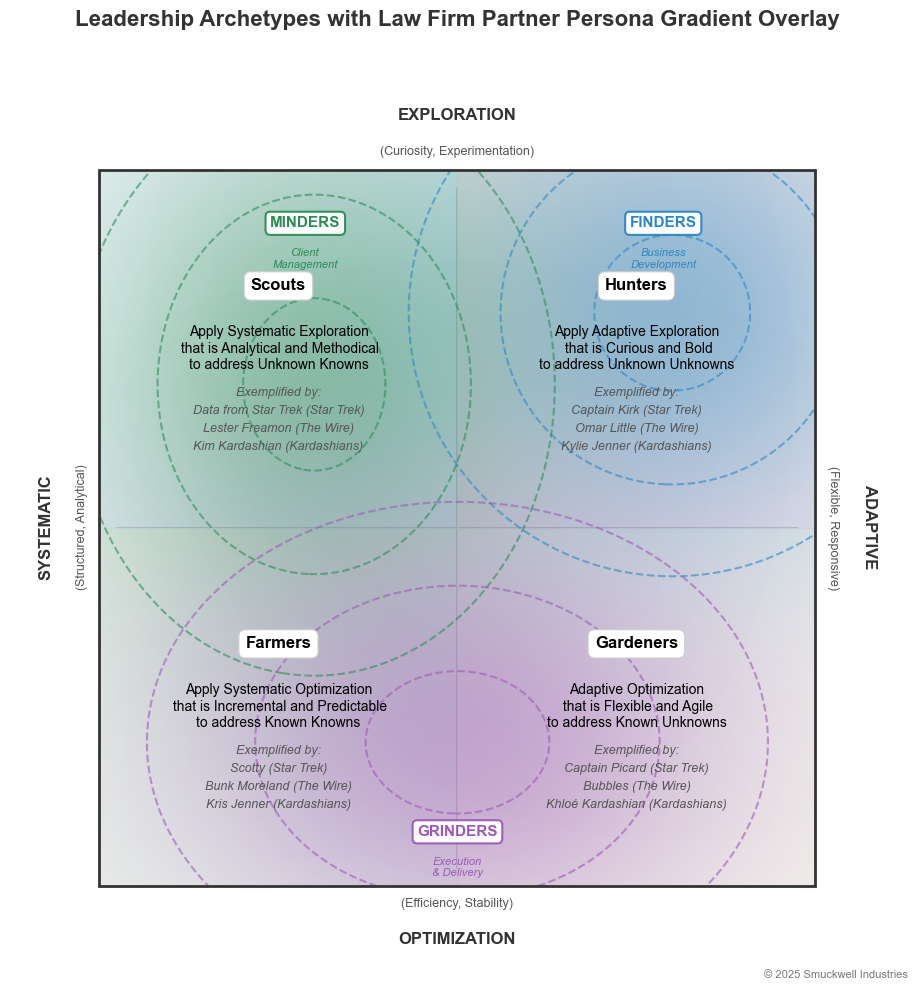

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.path import Path
import matplotlib.patches as mpatches
from hbr_plot_style import apply_hbr_style, HBR_COLORS, clean_text_box, set_figure_aesthetics, STANDARD_FIGURE_SIZES

# Add secondary color to HBR_COLORS
HBR_COLORS['secondary'] = '#2E8B57'  # Sea Green color for Minders
HBR_COLORS['primary'] = '#9B59B6'    # Purple color for Grinders (in case it's missing too)

# Apply the HBR style settings
apply_hbr_style()

# Create figure with white background using standard figure size
fig, ax = plt.subplots(figsize=STANDARD_FIGURE_SIZES['square_medium'], facecolor=HBR_COLORS['white'])

# Set quadrant backgrounds
quadrant_colors = [HBR_COLORS['quadrant1'], HBR_COLORS['quadrant2'], 
                  HBR_COLORS['quadrant3'], HBR_COLORS['quadrant4']]
positions = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Set quadrant backgrounds
for color, pos in zip(quadrant_colors, positions):
    ax.fill_between([0, pos[0]*2], 0, pos[1]*2, color=color, alpha=0.7)

# Define archetypes for each quadrant
archetypes = {
    "Scouts": (-1, 1),
    "Hunters": (1, 1),
    "Farmers": (-1, -1),
    "Gardeners": (1, -1)
}

# Define descriptions for each archetype
archetype_descriptions = {
    "Scouts": "Apply Systematic Exploration\n that is Analytical and Methodical\nto address Unknown Knowns",
    "Hunters": "Apply Adaptive Exploration\n that is Curious and Bold\nto address Unknown Unknowns",
    "Farmers": "Apply Systematic Optimization\n that is Incremental and Predictable\nto address Known Knowns",
    "Gardeners": "Adaptive Optimization\n that is Flexible and Agile\nto address Known Unknowns"
}

# Define characteristics for each quadrant
characteristics = {
    (-1, 1): "Analytical, Methodical",
    (1, 1): "Curious, Bold",
    (-1, -1): "Incremental, Predictable",
    (1, -1): "Flexible, Agile"
}

# Define characters for each archetype (grouped by universe)
character_examples = {
    # Star Trek Characters
    "Star Trek": {
        (-1, 1): "Data from Star Trek",          # Scout
        (1, 1): "Captain Kirk",   # Hunter
        (-1, -1): "Scotty",       # Farmer
        (1, -1): "Captain Picard" # Gardener
    },
    # The Wire Characters
    "The Wire": {
        (-1, 1): "Lester Freamon",  # Scout
        (1, 1): "Omar Little",      # Hunter
        (-1, -1): "Bunk Moreland",  # Farmer
        (1, -1): "Bubbles"          # Gardener
    },
    # Kardashian Characters
    "Kardashians": {
        (-1, 1): "Kim Kardashian",  # Scout
        (1, 1): "Kylie Jenner",     # Hunter
        (-1, -1): "Kris Jenner",    # Farmer
        (1, -1): "Khloé Kardashian" # Gardener
    }
}

# Plot labels for archetypes with consistent styling
for archetype, (x, y) in archetypes.items():
    # Main archetype name
    ax.text(x, y + 0.35, archetype, fontsize=12, ha='center', va='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=1, 
                     edgecolor='#cccccc', linewidth=0.8))
    
    # Description below the name
    ax.text(x, y + 0.0, archetype_descriptions[archetype], fontsize=10, ha='center', va='center')
    
    # Character examples - one from each universe
    y_offset = -0.25
    y_offset_increment = 0.10
    ax.text(x, y + y_offset, 'Exemplified by:', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
    y_offset -= y_offset_increment  # Move down for next character

    for universe, characters in character_examples.items():
        char_text = characters[(x, y)]
        ax.text(x, y + y_offset, char_text + ' (' + universe +')', fontsize=9, ha='center', va='center', 
                color=HBR_COLORS['light_text'], style='italic')
        y_offset -= y_offset_increment  # Move down for next character
    
# Create shorter axis lines that don't go all the way to the edge
x_line_length = 1.9  # Shorter horizontal line
y_line_length = 1.9  # Shorter vertical line

# Add shorter horizontal axis line
ax.plot([-x_line_length, x_line_length], [0, 0], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)
# Add shorter vertical axis line
ax.plot([0, 0], [-y_line_length, y_line_length], color=HBR_COLORS['text'], linewidth=1.2, linestyle='-', zorder=0)

# Axis labels - moved further away from the axes
# SYSTEMATIC (Left Axis)
ax.text(-2.3, 0, 'SYSTEMATIC', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=90)
ax.text(-2.1, 0, '(Structured, Analytical)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=90)

# ADAPTIVE (Right Axis)
ax.text(2.3, 0, 'ADAPTIVE', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'], rotation=270)
ax.text(2.1, 0, '(Flexible, Responsive)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'], rotation=270)

# EXPLORATION (Top Axis)
ax.text(0, 2.3, 'EXPLORATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, 2.1, '(Curiosity, Experimentation)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# OPTIMIZATION (Bottom Axis)
ax.text(0, -2.3, 'OPTIMIZATION', fontsize=12, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['text'])
ax.text(0, -2.1, '(Efficiency, Stability)', fontsize=9, ha='center', 
        va='center', color=HBR_COLORS['light_text'])

# Configure axes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])

# Create a clipping path for the quadrant square
quadrant_bound = 2.0
clip_path = Path([(-quadrant_bound, -quadrant_bound), 
                  (quadrant_bound, -quadrant_bound), 
                  (quadrant_bound, quadrant_bound), 
                  (-quadrant_bound, quadrant_bound), 
                  (-quadrant_bound, -quadrant_bound)])
clip_patch = mpatches.PathPatch(clip_path, transform=ax.transData, 
                                facecolor='none', edgecolor='none')

# Create gradient overlays for law firm archetypes
# Create a meshgrid for the entire plot area
x_grid = np.linspace(-2.5, 2.5, 300)
y_grid = np.linspace(-2.5, 2.5, 300)
X, Y = np.meshgrid(x_grid, y_grid)

# Define intensity functions for each archetype based on their centers and characteristics
# These use Gaussian-like falloff for smooth gradients

# FINDERS: Peak at upper right (exploration + adaptive)
# Center around (1.2, 1.2) with spread
finders_center_x, finders_center_y = 1.2, 1.2
finders_intensity = np.exp(-((X - finders_center_x)**2 / 1.8 + (Y - finders_center_y)**2 / 1.8))

# MINDERS: Peak at upper left (exploration + systematic, bridging both)
# Center around (-0.8, 0.8) with more spread vertically
minders_center_x, minders_center_y = -0.8, 0.8
minders_intensity = np.exp(-((X - minders_center_x)**2 / 1.5 + (Y - minders_center_y)**2 / 2.2))

# GRINDERS: Peak at lower center (optimization focused, spanning both systematic and adaptive)
# Center around (0, -1.2) with wide horizontal spread
grinders_center_x, grinders_center_y = 0, -1.2
grinders_intensity = np.exp(-((X - grinders_center_x)**2 / 2.5 + (Y - grinders_center_y)**2 / 1.5))

# Convert hex colors to RGB for gradient overlays
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

finders_rgb = hex_to_rgb(HBR_COLORS['accent_blue'])
minders_rgb = hex_to_rgb(HBR_COLORS['secondary'])
grinders_rgb = hex_to_rgb(HBR_COLORS['primary'])

# Create RGBA arrays with intensity-based alpha channel
finders_rgba = np.dstack([np.full_like(finders_intensity, finders_rgb[0]),
                          np.full_like(finders_intensity, finders_rgb[1]),
                          np.full_like(finders_intensity, finders_rgb[2]),
                          finders_intensity * 0.5])  # Max alpha of 0.5

minders_rgba = np.dstack([np.full_like(minders_intensity, minders_rgb[0]),
                          np.full_like(minders_intensity, minders_rgb[1]),
                          np.full_like(minders_intensity, minders_rgb[2]),
                          minders_intensity * 0.5])

grinders_rgba = np.dstack([np.full_like(grinders_intensity, grinders_rgb[0]),
                           np.full_like(grinders_intensity, grinders_rgb[1]),
                           np.full_like(grinders_intensity, grinders_rgb[2]),
                           grinders_intensity * 0.5])

# Plot the gradient overlays with clipping
img1 = ax.imshow(finders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')
img2 = ax.imshow(minders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')
img3 = ax.imshow(grinders_rgba, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', zorder=1, interpolation='gaussian')

# Apply clipping to each image
img1.set_clip_path(clip_patch)
img2.set_clip_path(clip_patch)
img3.set_clip_path(clip_patch)

# Add contour lines to show intensity levels more clearly with clipping
contour_levels = [0.3, 0.6, 0.9]
cs1 = ax.contour(X, Y, finders_intensity, levels=contour_levels, colors=[HBR_COLORS['accent_blue']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2, clip_path=clip_patch)
cs2 = ax.contour(X, Y, minders_intensity, levels=contour_levels, colors=[HBR_COLORS['secondary']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2, clip_path=clip_patch)
cs3 = ax.contour(X, Y, grinders_intensity, levels=contour_levels, colors=[HBR_COLORS['primary']], 
           linewidths=1.5, linestyles='--', alpha=0.6, zorder=2, clip_path=clip_patch)

# Add a crisp border around the quadrant area to define the clean boundary
border_rect = Rectangle((-quadrant_bound, -quadrant_bound), 2*quadrant_bound, 2*quadrant_bound,
                        fill=False, edgecolor=HBR_COLORS['text'], linewidth=2, zorder=5)
ax.add_patch(border_rect)

# Add law firm archetype labels
ax.text(1.15, 1.7, 'FINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['accent_blue'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['accent_blue'], linewidth=1.5), zorder=10)
ax.text(1.15, 1.5, 'Business\nDevelopment', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['accent_blue'], style='italic', zorder=10)

ax.text(-0.85, 1.7, 'MINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['secondary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['secondary'], linewidth=1.5), zorder=10)
ax.text(-0.85, 1.5, 'Client\nManagement', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['secondary'], style='italic', zorder=10)

ax.text(0.0, -1.7, 'GRINDERS', fontsize=11, ha='center', va='center', 
        weight='bold', color=HBR_COLORS['primary'],
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.95, 
                 edgecolor=HBR_COLORS['primary'], linewidth=1.5), zorder=10)
ax.text(0.0, -1.9, 'Execution\n& Delivery', fontsize=8, ha='center', va='center', 
        color=HBR_COLORS['primary'], style='italic', zorder=10)

# Set common figure aesthetics
set_figure_aesthetics(fig, ax, 
                     title="Leadership Archetypes with Law Firm Partner Persona Gradient Overlay")

# Add copyright notice at the bottom of the figure
fig.text(0.94, 0.01, "© 2025 Smuckwell Industries", 
         fontsize=8, color=HBR_COLORS['light_text'], 
         ha='right', va='bottom', alpha=0.8)

output_path = os.path.join('images', 'hunter_scout_gardener_farmer-archetype_quadrants_with_law_firm_persona_gradients.png')

# Save the figure
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=HBR_COLORS['white'])

plt.show()